In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## start comparaison 
## on va comparer le DNN avec un RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
## end comparaison


import tensorflow as tf
from keras.layers import Dense,InputLayer
from keras.datasets import mnist, fashion_mnist


In [6]:
random_state = 42

tf.random.set_seed(
    random_state
)

"""https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network"""

# utilities

In [7]:
## plot and evaluate model

def plot_cm_display(y_true: np.array, y_pred: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    
    #plt.figure(figsize=(20, 8))
    #plt.title('Confusion Matrix\n')
    CM = ConfusionMatrixDisplay(cm)
    CM.plot()
    #sns.heatmap(cm, cmap='vlag', annot=True, fmt='d', cbar=False)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.show()


def plot_lc(history: dict, metrics: list = ['loss', 'accuracy']) -> None:
    plt.figure(figsize=(20, 8))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.title(f'Learning curve for {metric}\n')
        plt.plot(history[metric], label='train')
        plt.plot(history[f'val_{metric}'], label='val')
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        if metric == 'accuracy':
            plt.ylim(0,1.1)
    plt.show()



# Data

In [48]:
### integrated data "mnist" from tensorflow
### only use this method for library-integrated data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [49]:
#60k imgs with 28 pixels by 28 pixels
X_train.shape

(60000, 28, 28)

# EDA


## format

In [10]:
type(X_train)

numpy.ndarray

In [11]:
X_train.shape ### 60_000 lignes/number of images, 28x28 pixels

(60000, 28, 28)

In [12]:
X_train.dtype # unsigned integer 0->255

dtype('uint8')

In [13]:
np.sum(np.isnan(X_train),axis=None)

np.int64(0)

## univariate-target

y_train
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

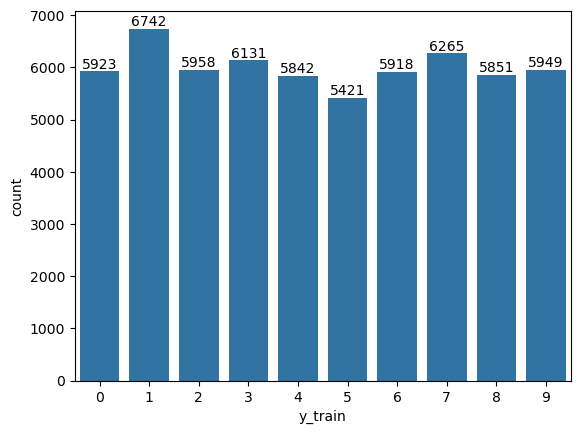

In [14]:
y_series = pd.Series(data=y_train, name='y_train')
GB_y = y_series.value_counts().sort_index()
display(GB_y)

ax = sns.barplot(x=GB_y.index,y=GB_y)
for c in ax.containers:
    ax.bar_label(c)
plt.show()


## univariate-features

In [15]:
print('max =',np.max(X_train,axis=None))
print('min =',np.min(X_train,axis=None))
print('mean =',np.mean(X_train,axis=None))
print('std =',np.std(X_train,axis=None))

max = 255
min = 0
mean = 33.318421449829934
std = 78.56748998339798


## distribution of images

### examples

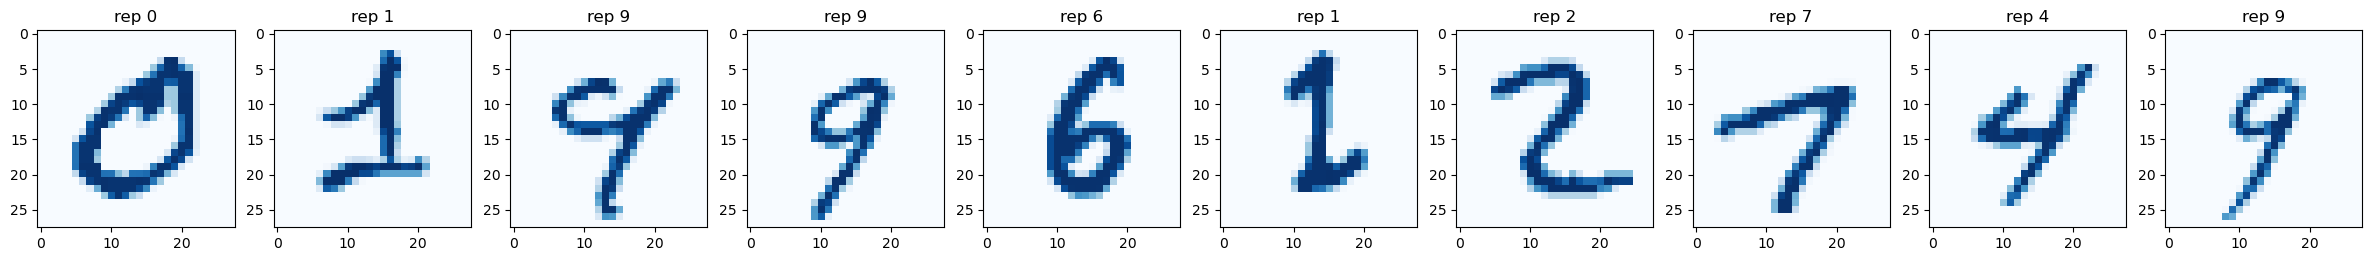

In [16]:
N = 10
lst_rdm = np.unique(np.random.randint(1,200,N))

plt.figure(figsize=(3*N,5))
for n,idx in enumerate(lst_rdm):
    plt.subplot(1,N,n+1)
    plt.imshow(X_train[idx], cmap='Blues')
    plt.title(f'rep {y_train[idx]}')

plt.show()

## global distribution

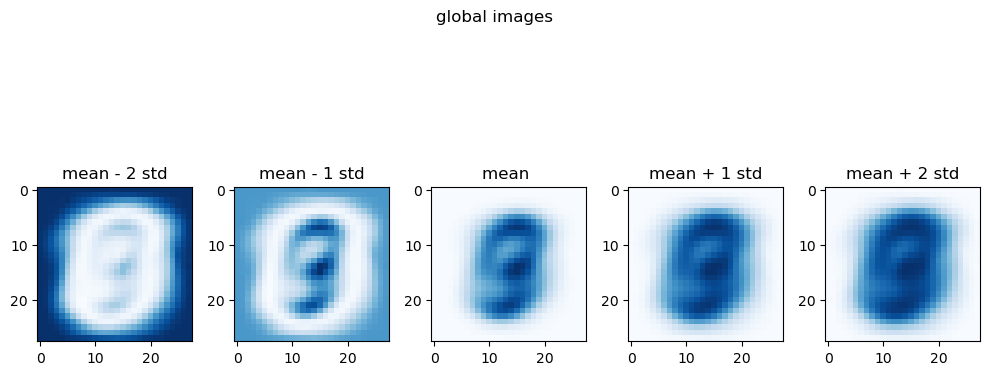

In [17]:
glob_avg_img = np.mean(X_train,axis=0) ## image moyenne
glob_std_img = np.std(X_train,axis=0) ## std d'image

plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.imshow(glob_avg_img-2*glob_std_img,cmap='Blues')
plt.title(f'mean - 2 std')

plt.subplot(1,5,2)
plt.imshow(glob_avg_img-1*glob_std_img,cmap='Blues')
plt.title(f'mean - 1 std')

plt.subplot(1,5,3)
plt.imshow(glob_avg_img ,cmap='Blues')
plt.title(f'mean ')

plt.subplot(1,5,4)
plt.imshow(glob_avg_img+1*glob_std_img,cmap='Blues')
plt.title(f'mean + 1 std')

plt.subplot(1,5,5)
plt.imshow(glob_avg_img+2*glob_std_img,cmap='Blues')
plt.title(f'mean + 2 std')

plt.suptitle('global images')
plt.tight_layout()
plt.show()

## bivariate image distribution

------------------------------
y = 0
max = 255
min = 0
mean = 44.21682790539819
std = 88.66807293975513
------------------------------


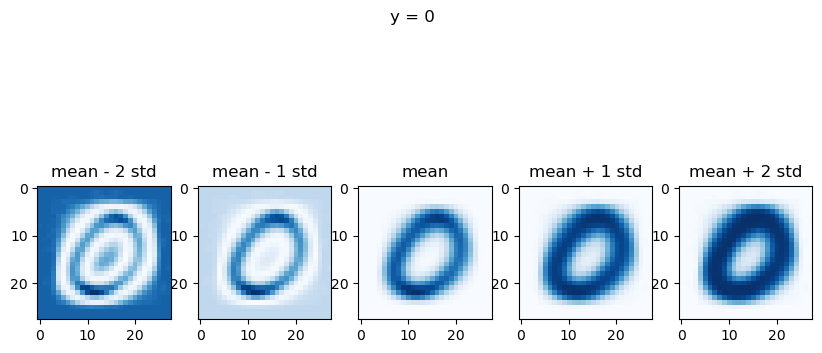

------------------------------
y = 1
max = 255
min = 0
mean = 19.379653852790003
std = 62.29178755571119
------------------------------


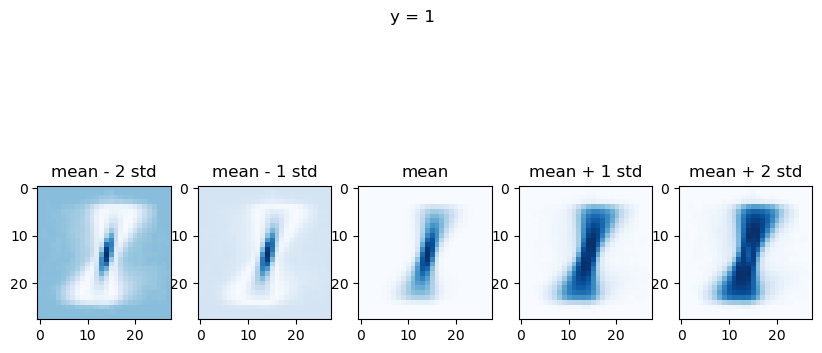

------------------------------
y = 2
max = 255
min = 0
mean = 37.98865784984689
std = 83.11048388578874
------------------------------


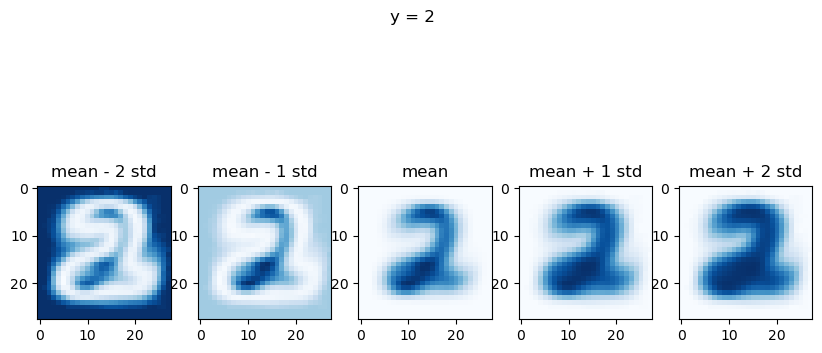

------------------------------
y = 3
max = 255
min = 0
mean = 36.09018653946654
std = 81.0692353756164
------------------------------


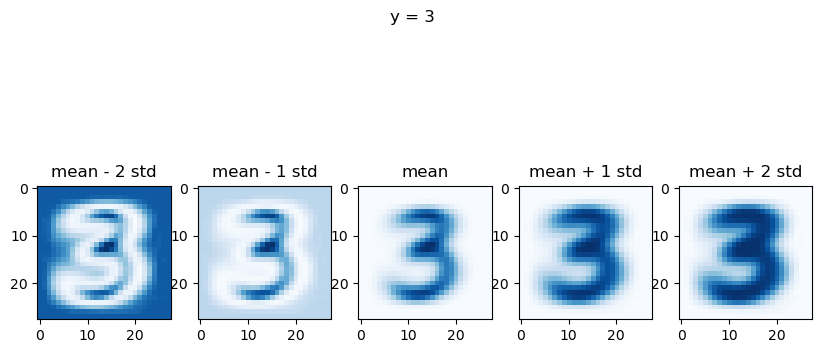

------------------------------
y = 4
max = 255
min = 0
mean = 30.94822568277568
std = 75.85848996400738
------------------------------


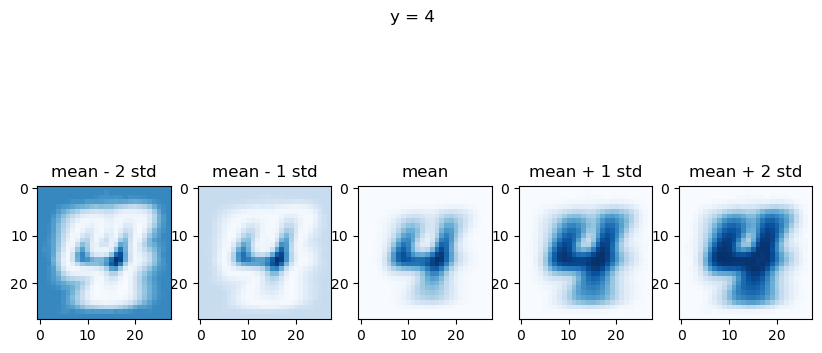

------------------------------
y = 5
max = 255
min = 0
mean = 32.83109548467976
std = 77.41506624626122
------------------------------


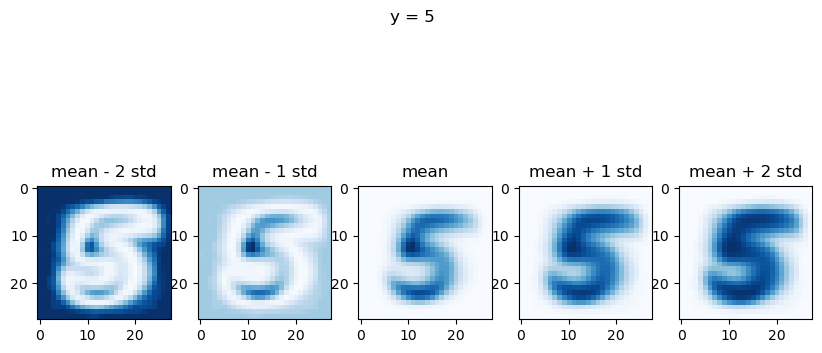

------------------------------
y = 6
max = 255
min = 0
mean = 35.01195268154575
std = 80.29885348978507
------------------------------


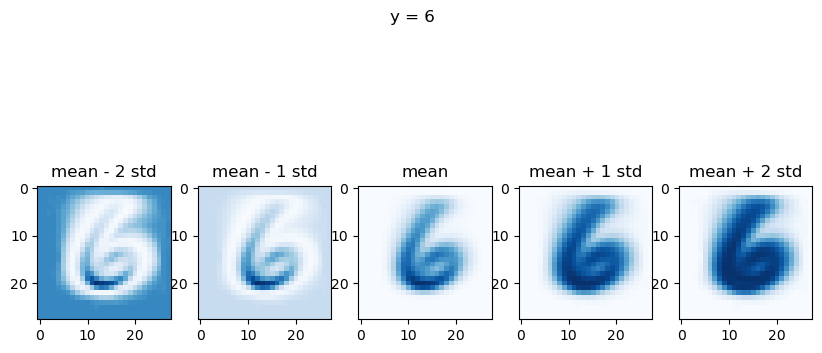

------------------------------
y = 7
max = 255
min = 0
mean = 29.204562926527355
std = 74.38243138303984
------------------------------


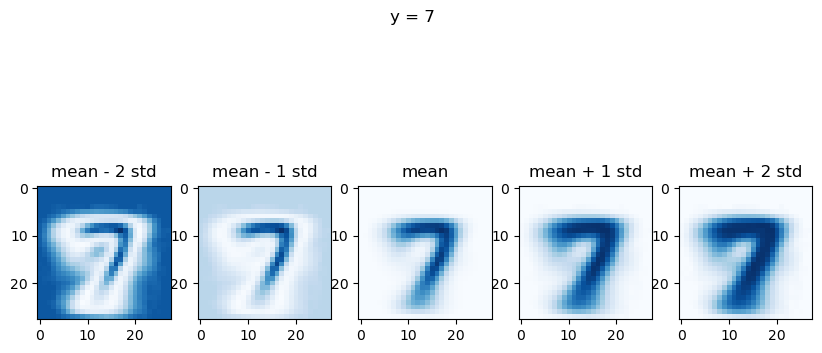

------------------------------
y = 8
max = 255
min = 0
mean = 38.28977538289286
std = 82.9412885831376
------------------------------


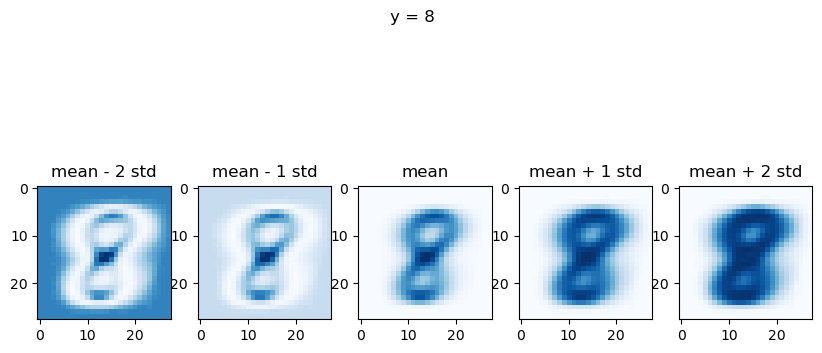

------------------------------
y = 9
max = 255
min = 0
mean = 31.26043542732272
std = 76.15257205456176
------------------------------


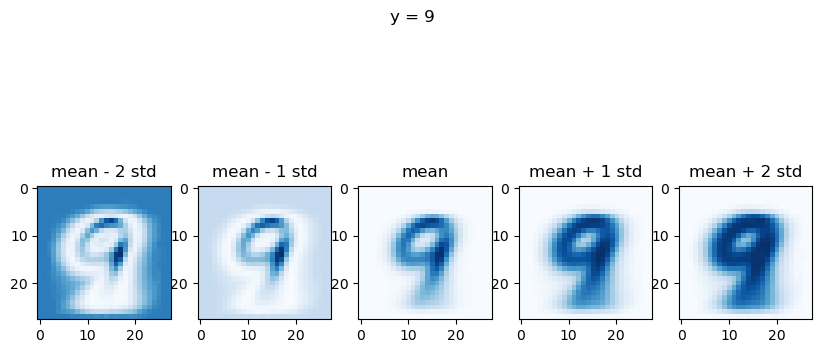

In [18]:
N_y = len(GB_y)

for n,y in enumerate(GB_y.index):
    
    plt.figure(figsize=(10,5))
    cond_y = y_train == y
    X_train_y = X_train[cond_y]
    print('-'*30)
    print(f'y = {y}')
    print('max =',np.max(X_train_y,axis=None))
    print('min =',np.min(X_train_y,axis=None))
    print('mean =',np.mean(X_train_y,axis=None))
    print('std =',np.std(X_train_y,axis=None))
    print('-'*30)
    
    avg_img_y = np.mean(X_train_y ,axis=0)
    std_img_y = np.std(X_train_y  ,axis=0)

    plt.subplot(1, 5, 1)
    plt.imshow(avg_img_y-2*std_img_y,cmap='Blues')
    plt.title(f'mean - 2 std')
    
    plt.subplot(1, 5, 2)
    plt.imshow(avg_img_y-1*std_img_y,cmap='Blues')
    plt.title(f'mean - 1 std')
    
    plt.subplot(1, 5, 3)
    plt.imshow(avg_img_y ,cmap='Blues')
    plt.title(f'mean')
    
    plt.subplot(1, 5, 4)
    plt.imshow(avg_img_y+1*std_img_y,cmap='Blues')
    plt.title(f'mean + 1 std')
    
    plt.subplot(1, 5, 5)
    plt.imshow(avg_img_y+2*std_img_y,cmap='Blues')
    plt.title(f'mean + 2 std')

    plt.suptitle(f'y = {y}')
    plt.show()
    
    

# preprocessing

In [50]:

### NN très sensible à l'echelle de grandeur ==> standardiser/normaliser entre 0 et 1 par convention
X_train = X_train/np.max(X_train,axis=None) ## diviser par 255
X_test = X_test/np.max(X_test,axis=None)

### Preprocessing pour le DNN
flattened_X_train = X_train.reshape(60_000,28*28) ### init = (60_000, 28,28) -> new = (60_000,28*28) ## (-1,28*28) = ('flexible'/undefined/rest, 28*28) 
flattened_X_test = X_test.reshape(-1,28*28)

In [46]:
flattened_X_train.shape

(60000, 784)

In [47]:
flattened_X_test.shape

(10000, 784)

In [16]:
28*28

784

# Models

In [53]:
def simple_model():
    N_CLASSES = 10           ## number of classes to predict
    INPUT_SHAPE = (28*28,)   ## shape of X_train
    OUTPUT_ACTIVATION_FUNCTION = 'softmax' ## softmax because multiple categories
    LOSS = 'sparse_categorical_crossentropy'
    
    simple = tf.keras.models.Sequential([
        ### not required,
        ### but suggested to impose a fixed shape as input 
        InputLayer(shape=INPUT_SHAPE)

        ### hidden layers 
        , Dense(128, activation='relu')

        ### output layer
        , Dense(units=N_CLASSES
               ,activation= OUTPUT_ACTIVATION_FUNCTION
               ,name ='my_output_layer'
            )
    ])

    ### "compile"/compress model = MANDATORY
    simple.compile(
        optimizer='adam', #'adam', ## use this by default
        loss=LOSS, ## binary classification
        metrics=['accuracy'] ## additional metric
    )
    return simple

In [54]:
my_model = simple_model()

my_model.fit(
    flattened_X_train,
    y_train,
    batch_size=16,
    validation_split=0.15,
    epochs=20
)

Epoch 1/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9262 - loss: 0.2559 - val_accuracy: 0.9643 - val_loss: 0.1256
Epoch 2/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9672 - loss: 0.1081 - val_accuracy: 0.9720 - val_loss: 0.0942
Epoch 3/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9786 - loss: 0.0704 - val_accuracy: 0.9746 - val_loss: 0.0845
Epoch 4/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9849 - loss: 0.0497 - val_accuracy: 0.9760 - val_loss: 0.0866
Epoch 5/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9896 - loss: 0.0354 - val_accuracy: 0.9770 - val_loss: 0.0852
Epoch 6/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9924 - loss: 0.0262 - val_accuracy: 0.9746 - val_loss: 0.0972
Epoch 7/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9937 - loss: 0.0210 - val_accuracy: 0.9740 - val_loss: 0.1056
Epoch 8/20
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9950 - loss: 0.0167 

In [55]:
history = my_model.history.history
display(my_model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_output_layer (Dense)         │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

None

In [59]:
tf.keras.utils.plot_model(
    model = my_model,
    show_layer_activations=True,
    show_shapes=True
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


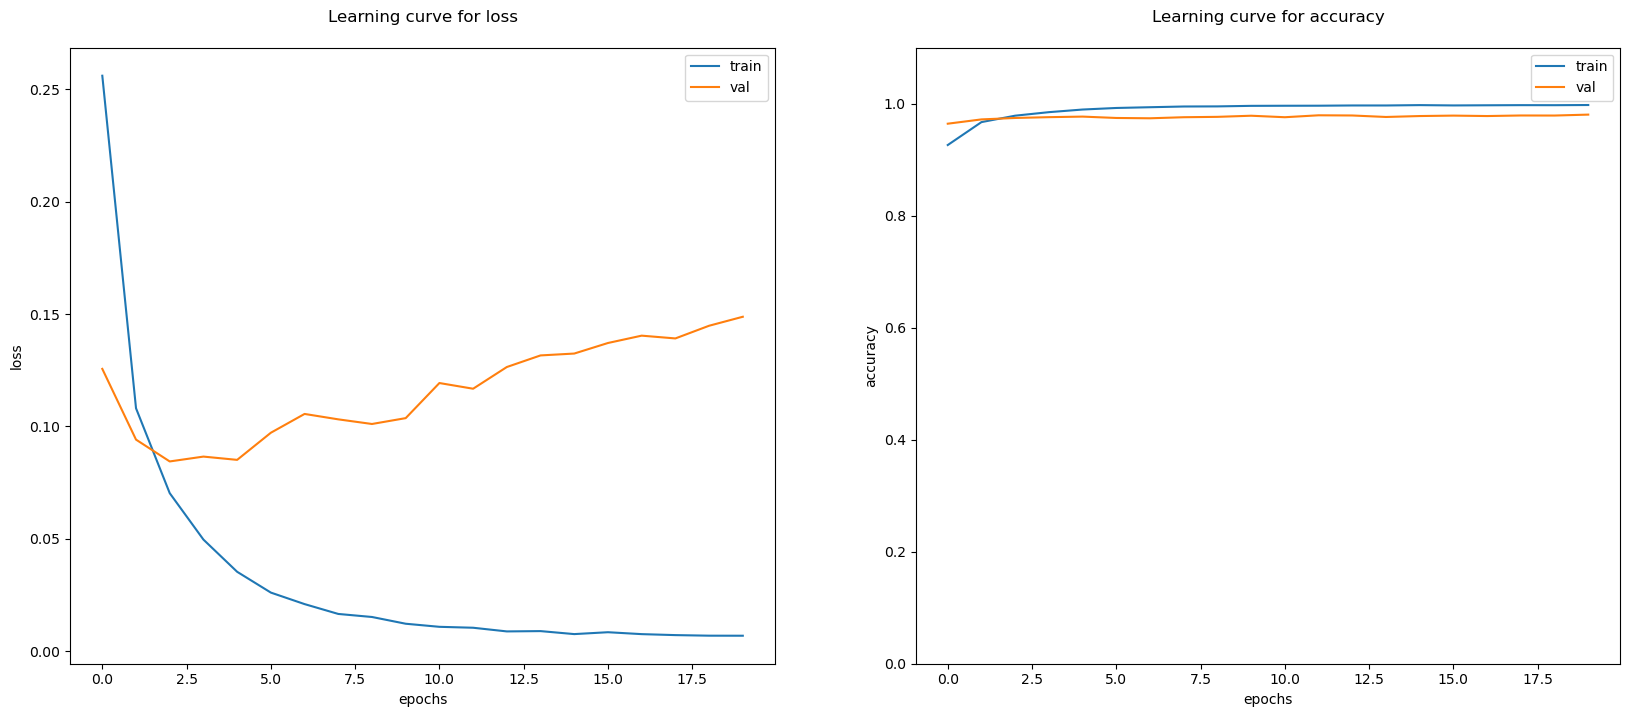

In [60]:
H = my_model.history.history

plot_lc(history=H)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


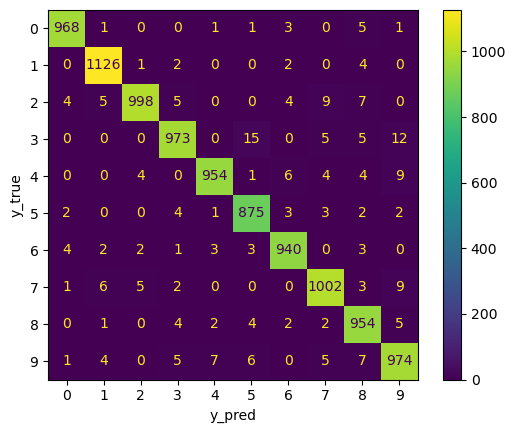

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [61]:
y_pred_range = my_model.predict(flattened_X_test)
y_pred = np.argmax(y_pred_range,axis=1)

plot_cm_display(y_true=y_test,y_pred=y_pred)
print(classification_report(y_true=y_test,y_pred=y_pred))